# Continuous-time linear systems

## Stability Analysis

The Lyapunov theory will be employed to check the stability of the system, considering a quadratic Lyapunov function $V(x)=x^TPx$. The Lyapunov function must be positive along the trajectories of the system, i.e., $V(x)>0$. Moreover, the derivative of the Lyapunov function must be negative $\dot{V}(x)<0$.

Consider the following continuous-time system
$$
\dot{x}=Ax.
$$

To provide a stability certificate for this system, the Lyapunov theory will be employed. One must have:

i) $V(x)>0$,

$x^TPx>0$, or simply $P>0$.


ii) $\dot{V}(x)<0$,

$\dot{x}^TPx+ {x}^TP\dot{x}<0$, or

$x^TA^TPx+x^TPAx<0$, which can be verified by the following condition

$A^TP+PA<0$.

We have a set with two Linear Matrix Inequalities (LMIs), that can be solved thanks to the existence of semidefinite programming tools. Once the LMIs are solved we will have an answer about the stability of the system. For precisely known systems, the conditions
$$
P>0, \quad A^TP+PA<0,
$$
are necessary and sufficient to certify the stability of the system $\dot{x}=Ax$.


The following example will be employed to show how cvxpy can be used to solve such a problem.

Consider the following continuous-time autonomous system.
$$
\dot{x}=\begin{bmatrix}-1 & 1 \\ 0.5 & -1 \end{bmatrix}x
$$


In [1]:
#Stability of linear continuous-time systems

import cvxpy as cp
import numpy as np

#Define the system matrix
A = np.array([[-1, 1],[0.5, -1]])
#Find the number of states
nx=A.shape[0]
#Create the decision variable
P = cp.Variable((nx,nx), PSD=True)
#Add the constraints
constraints = [P >> np.eye(nx), A.T@P + P@A << -np.eye(nx)]
#Create the objective function
objective = cp.Minimize(0)
#Define the problem to be solved
problem = cp.Problem(objective,constraints)
#Solve the problem
result = problem.solve()
#Print status and solution
if problem.status in ["optimal"]:
    P = P.value
    print(f"status: {problem.status}")
    print(f"The Lyapunov matrix is:\n{P}")

    # Check if P is positive definite
    eigenvalues = np.linalg.eigvals(P)
    print(f"The eigenvalues of the Lyapunov matrix are: {eigenvalues}")

    # Check positive definiteness by verifying that all eigenvalues are positive
    if np.all(eigenvalues > 0):
        print("P is positive definite.")
    else:
        print("P is not positive definite.")
else:
    print(f"Problem status: {problem.status}. No valid solution found.")

#Check the eigenvalues of A
eigenvaluesA = np.linalg.eigvals(A)
print(f"The eigenvalues of the matrix A are: {eigenvaluesA}")

status: optimal
The Lyapunov matrix is:
[[1.7863245  0.49112191]
 [0.49112191 2.29234457]]
The eigenvalues of the Lyapunov matrix are: [1.48687204 2.59179703]
P is positive definite.
The eigenvalues of the matrix A are: [-0.29289322 -1.70710678]


Note that the status of the solution is optimal, indicating that the problem was solved and a solution was found. Another important point is the fact that the constraints used were
$$
P>I, \quad A^TP+PA<-I.
$$
This is because cvxpy only considers non-strict inequalities. To be sure that the solution is positive or negative definite, we must impose this constraints. We could also use
$$
P>\varepsilon I, \quad A^TP+PA<-\varepsilon I.
$$
with a small value of $\varepsilon>0$.

In the sequel we show how to compute the time-response for the system $\dot{x}=Ax$, we also use the states value to plot the trajectories of the Lyapunov function $V(x)=x^TPx$.

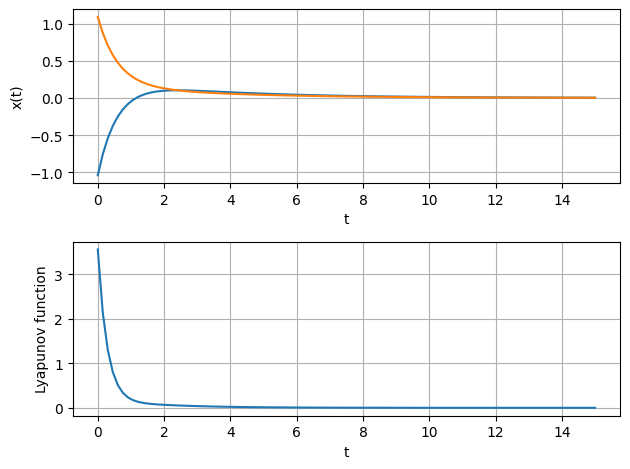

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#System matrices
A = np.array([[-1.0, 1],[0.5,-1]])

#random initial condition
x0 = np.random.randn(2)

# Define the ODE
def system(x, t):
    dxdt = A@x #\dot{x}=Ax
    return dxdt

# Simulation time
t0=0
tf=15
npt=100
t = np.linspace(t0,tf,npt)  # From t0 to tf with np points

# solve the ODE with the given initial condition
sol = odeint(system, x0, t)

# Taking the solution
x = sol[:,:]

x1 = sol[:, 0]  # First state
x2 = sol[:, 1]  # Second state

#Creating a vector to store the values of the Lyapunov function
V = np.zeros(len(t))

# Computing V=x'Px
for i in range(len(t)):
    x_i = np.array([x1[i], x2[i]])
    V[i] =  x_i.T@P@x_i


plt.figure()
plt.subplot(211)
plt.plot(t, x)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid(True)

plt.subplot(212)
plt.plot(t, V)
plt.xlabel('t')
plt.ylabel('Lyapunov function')
plt.grid(True)


plt.tight_layout()

plt.show()



Observe that the trajectories of the system converge to zero, since the system is asymptotically stable. Moreover, the computed Lyapunov function is always positive and monotonically decreasing, which guarantees that $V(x)>0$ and
$\dot{V}(x)<0$ for all $x \neq 0$ .